# AI4I: Foundations in AI
## DPL-4 Deep Learning Exercise and Quiz


## Welcome Note

Welcome to Deep Learning!

In this module, we will be building two image classifies. These image classifiers will learn how to look at an image and predict what is the main object in the image - is it a cat, a dog, or a truck?

The key difference between these two image classifiers is the type of dataset they are trained on; the first image classifier will be trained on a grayscale image dataset and the second image classifier will be trained on a more complex coloured dataset.

Core concepts will be explained throughout this workbook and relevant links for further readings are provided whenever appropriate. You could follow these links to read further into each concept.

Ready? Let's get started!

## Learning Objectives

1.   **How to build a simple image classifier**
    * Practice setting up layers and using them for image classification

2.   **How do underfitting and overfitting happen in deep learning? How to prevent them?**
    * Practice using early stopping to prevent overfitting and weights recall to retrieve optimal model weights

3.   **How does a model pass it learning to another model?**
    * Understand the concepts of pre-trained neural network

4.   **How to re-purpose a pre-trained model on for new dataset?**
    * Practice retraining layers of the pre-trained model to improve the model performance



## Instructions for Using this Notebook

1.   Enable 'GPU' hardware accelerator by going to 'Runtime', 'Change Runtime Type', and select 'GPU' under 'Hardware Accelerator'.
2.   Run each cell pressing 'Shift + Enter' or run all cells by going to 'Runtime', then 'Restart and Run All'.



# Import Libraries

We import required libraries, mainly [tensorflow 2.0](https://www.tensorflow.org/beta/guide/effective_tf2), to assist us in building image classifier. Libraries are essentially a collection of functions compressed into simple, easy to use format. You could read up the library's source code to understand what goes behind the scene each time we use a function from it.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Upgrade pip and conda to ensure smooth installation of tensorflow
!pip install --upgrade pip
!conda update  --quiet --yes wrapt

# Upgrade tensorflow to latest version
!pip install tensorflow==2.0.0-rc0

# Import deep learning related dependencies
import tensorflow as tf

# Import tran_test_split to split data into smaller subsets
from sklearn.model_selection import train_test_split

# Import graphing dependencies
from matplotlib import pyplot as plt

# Include graph in notebook, next to code
%matplotlib inline

# Improve the resolution of graph
%config InlineBackend.figure_format = 'retina'

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.2.3)


# Training A Simple Image Classifier on Simple Dataset

In this section, we will build a simple image classifier  from scratch and train it with a simple, grayscale dataset. The purpose is to introduce the core concepts of constructing an image classifier.

## Import Fashion MNIST dataset

We need data to train an image classifier; we download the Fashion MNIST dataset and store them separately into train and test set.

We use the train set to train our model and the test set (data hidden from the model during training) to test the performance of our model.

In [ ]:
# Import Fashion MNIST dataset
mnist = tf.keras.datasets.fashion_mnist

# Split data into train and test set
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

## Explore Fashion MNIST Dataset

### Shape of Fashion MNIST Dataset

It is essential to explore the shape or dimension of a new dataset each time. The shape of the dataset tells us:
1. The amount of data we have
2. The potential type of data we are dealing with

This information will help when doing data pre-processing and constructing model architecture. In a typical image dataset, the shape of the dataset is structured in this format: `{number of images, x-axis pixel, y-axis pixel, colour channel}`.

An image with colour usually has 3 colour channel (Red, Green, Blue), while a grayscale image will have 1 colour channel)

In [ ]:
# print out the shape of data set
print(f'Shape of mnist_x_train dataset: {mnist_x_train.shape}')
print(f'Shape of mnist_y_train dataset: {mnist_y_train.shape}')

print(f'Shape of mnist_x_test dataset: {mnist_x_test.shape}')
print(f'Shope of mnist_y_test dataset: {mnist_y_test.shape}')

Shape of mnist_x_train dataset: (60000, 28, 28)
Shape of mnist_y_train dataset: (60000,)
Shape of mnist_x_test dataset: (10000, 28, 28)
Shope of mnist_y_test dataset: (10000,)


From the shape of the dataset, we could tell the following:
*   There are 60,000 images in the train dataset (mnist_x_train)
*   There are 10,000 images in the test dataset (mnist_x_test)
*   Each image in the dataset is of 28 by 28 pixels
*   The image is probably in grayscale as it does not have a colour channel

### Images of Fashion MNIST Dataset

Below is an example of the images in the dataset; each class (or category of image) takes three-rows. For instance, the first 3 rows of images are shirts and the last 3 rows of images are boots. You can read up more about this dataset via this [link](https://github.com/zalandoresearch/fashion-mnist).

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite" width="400">
  </td></tr>
  <tr><td align="center">
    <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

### Labels of Fashion MNIST dataset

Based on the [description of the dataset](https://github.com/zalandoresearch/fashion-mnist), there are 10 categories of images and each image is mapped to a label:


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>


This information is critical when it comes to building up our model architecture; the number of nodes at the last layer of an image classifier has to be the same as the number of labels. This will be elaborated further later on.

## Data Pre-Processing

### Normalising Values

An image is made up of pixels. Each pixel has a value range of 0 to 255, where 0 is black and 255 is white.

While not necessary, it is a common practice to normalise an image's pixels by dividing them by 255. This will result in all pixels to be in the range of 0 to 1. Why do we need to normalise the pixels? The model training performs better for a value between 0 and 1 compared to large integers of 0 to 255.

In [ ]:
# Normalise pixels value
norm_mnist_x_train = mnist_x_train/255.0
norm_mnist_x_test = mnist_x_test/255.0

### Reshaping Data

The shape of the tensor (or data structure) of train dataset is (60000, 28, 28). Feeding this data into the model would result in an error as we are using a [Convolution 2D layer (Conv2D)](https://en.wikipedia.org/wiki/Convolutional_neural_network) as the first layer in our model.

According to the [documentation of TensorFlow 2.0](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Conv2D), a Convolution 2D layer requires data with input shape (batch, rows, cols, channels). We can do the data reshaping with `.reshape()` method.

The reshape method allows us to specify what shape do we want the data to be in and the data will be reshaped accordingly. Note that we used a `-1` for our data reshaping; the `-1` essentially tells the method to infer what the right number should be, given other dimension inputs.

In [ ]:
# Reshaping data to 4D tensor
reshaped_mnist_x_train = norm_mnist_x_train.reshape(-1, 28, 28, 1)
reshaped_mnist_x_test = norm_mnist_x_test.reshape(-1, 28, 28, 1)

The results below show the effect of reshaping the data; the original tensor has a shape of (60000, 28, 28); the reshaped tensor has a shape of (60000, 28, 28, 1). This can be interpreted as the dataset has 60,000 images; each image is 28 by 28 pixel and has 1 colour channel (grayscale).

In [ ]:
print(f'Shape of mnist_x_train BEFORE reshaping {norm_mnist_x_train.shape}')
print(f'Shape of mnist_x_train AFTER reshaping {reshaped_mnist_x_train.shape}')

Shape of mnist_x_train BEFORE reshaping (60000, 28, 28)
Shape of mnist_x_train AFTER reshaping (60000, 28, 28, 1)


## Define Model Architecture

The model's architecture needs to be defined before we could perform model training. The architecture determines how the data will flow through the model, how the data will be transformed, and how the model should learn from the data.

In the architecture defined below, we are instructing TensorFlow to build the following model for us:

1.  Create a [Sequential](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/Sequential) model or a linear stack of layers; this makes the data to flow from left to the right (or bottom to top, if you prefer) in a sequential linear manner;

2.  The first layer of the model is a [Convolution 2D (Conv2D)](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Conv2D) layer. This layer extracts key information (or features) from the image by [sliding multiple filters through the image](https://tensorspace.org/html/docs/layerConv2d.html). The input shape of this has to be the same as the image in the dataset;

3.  Perform [MaxPooling2D](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/MaxPool2D) to the output from the Conv2D; this layer kept the [most important feature](https://tensorspace.org/html/docs/layerPooling2d.html) filtered by the Conv2D layer. The common method is to keep the highest value in each of the filtered features of the image.

4.  [Flatten](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Flatten) the output from the previous layer. This compresses multi-dimensional matrix to a [1-dimension vector](https://tensorspace.org/html/docs/layerFlatten.html); this is required before passing the data to a Dense layer.

5.  [Dense layer](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dense) is a fully connected neural network layer. A dense layer is a plain vanilla, traditional Deep Learning layer; each output node from the previous layer is connected to each node in this layer, like a network mesh. A dense layer is coupled with a [Rectified Linear Unit (ReLU) Activation](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/activations/relu) to introduce non-linearity to the model; this allows the model to learn the non-linear relationship between the input data and predicted output.

6.  [Dropout](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/Dropout) is applied to randomly switch off some of the nodes in the previous Dense layer. This layer does not learn from the data; rather, it helps to regulate the model's learning by preventing the model from overfitting (or memorising) the input data.

7.  The number of nodes at the last Dense layer has to be equal to the number of classes/labels/categories of images to predict. In our case, because the Fashion MNIST dataset has 10 categories of fashion items, we set our last dense layer to have 10 nodes. Also, a [Softmax Activation](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/activations/softmax) is used to ensure the total predicted probabilities of each label sum up to 1. Each predicted category is given a probability; the prediction with the highest probability is taken as the actual prediction of the model.

In [ ]:
# Define the model architrcture
mnist_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,
                           kernel_size=(3, 3),
                           activation='relu',
                           input_shape=(reshaped_mnist_x_train.shape[1],
                                        reshaped_mnist_x_train.shape[2],
                                        reshaped_mnist_x_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

The model's summary below gives an overview of our model. It shows the number of trainable parameters of the model; our deep learning model has to tune 693,962 parameters to learn how to correctly predict each image in our Fashion MNIST dataset.

Ponder about this for a while...that's a lot of parameters to tune! This is a reason why we need GPU (Graphics Processing Unit) for deep learning; GPU excels in executing multiple parallel processing.

In [ ]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

The last step for our model architecture is to define the model's optimiser, loss calculation, and metrics for model performance:

*   **Loss** calculation is the method for measuring the difference (or loss) between actual and predicted values. [Sparse Categorical Crossentrophy](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy) is commonly used for the image classification model.

*   **Metrics** is the model's scoring method to determine the performance of the model. We are using [Accuracy](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics/Accuracy) to measure the model's performance.

*   **Optimiser** is the method to adjust the weights and bias (parameters) of the model to improve its metrics (or performance). [Adam](https://www.tensorflow.org/api_docs/python/tf/contrib/optimizer_v2/AdamOptimizer) is the most commonly used optimiser.

In [ ]:
# Define the optimizer, loss, and metrics of model
mnist_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

## Model Training

We pass the training data (reshaped_mnist_x_train) and its corresponding label (mnist_y_train) into the model and start the model by calling the `.fit` method. The model will then pass the images over the sequential network and measure the generated output label against the actual label (mnist_y_train).

Based on the differences in value, the model will perform backpropagation by tweaking all the nodes' weights and biases. The objective is to get the optimal weights and biases that give the lowest loss.

Epoch is the number of times we passed the entire dataset through the model. Too few epochs will result in the model being under fitted (not learning enough from the data) while too many epochs will result in the model in being overfitted (memorising the answer rather than learning how to generalise); both will result in underperformance of the model.

Therefore, we split a validation set from the training data set by using `validation_split=0.2`. At each pre-determined epoch, the model performance will be tested against the validation set.

We prevent the model from overfitting by using [earlystopping](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/callbacks/EarlyStopping). Once the performance (`val_loss`) of the model for the validation dataset starts to increase, the model will stop training to prevent overfitting. Under-fitting will occur if there is too few epoch; this seldom happens in a deep learning model.

In [ ]:
# Set up instructions to prevent overfitting of model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            verbose=1)

In [ ]:
# Initiatlise model training
mnist_model.fit(reshaped_mnist_x_train, mnist_y_train,
                validation_split = 0.2,
                callbacks=[callback],
                shuffle=True,
                verbose=2,
                epochs=20,
                use_multiprocessing=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 19s - loss: 0.4283 - accuracy: 0.8497 - val_loss: 0.3023 - val_accuracy: 0.8918
Epoch 2/20
48000/48000 - 18s - loss: 0.2914 - accuracy: 0.8937 - val_loss: 0.2729 - val_accuracy: 0.9017
Epoch 3/20
48000/48000 - 18s - loss: 0.2506 - accuracy: 0.9089 - val_loss: 0.2527 - val_accuracy: 0.9107
Epoch 4/20
48000/48000 - 18s - loss: 0.2195 - accuracy: 0.9197 - val_loss: 0.2646 - val_accuracy: 0.9027
Epoch 5/20
48000/48000 - 18s - loss: 0.1966 - accuracy: 0.9274 - val_loss: 0.2647 - val_accuracy: 0.9066
Epoch 6/20
48000/48000 - 18s - loss: 0.1762 - accuracy: 0.9347 - val_loss: 0.2424 - val_accuracy: 0.9141
Epoch 7/20
48000/48000 - 18s - loss: 0.1552 - accuracy: 0.9422 - val_loss: 0.2583 - val_accuracy: 0.9125
Epoch 8/20
48000/48000 - 19s - loss: 0.1372 - accuracy: 0.9494 - val_loss: 0.2588 - val_accuracy: 0.9141
Epoch 9/20
48000/48000 - 19s - loss: 0.1288 - accuracy: 0.9521 - val_loss: 0.2668 - val_accuracy: 0.9180
Epoch

Amazing! With just a few lines of code, the image classifier has achieved an accuracy score of ~95%!

Let's test our trained model on the test dataset to gauge its performance on an unseen dataset. Recall that test dataset is purposely hidden from the model during the training stage. The score from the test dataset would give a good representation of how the model will perform 'out in the wild'.

In [ ]:
# evaluate the performance of the model
mnist_model.evaluate(reshaped_mnist_x_test, mnist_y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2809726796105504, 0.9101]

The model evaluation on test dataset gives an accuracy of ~91%!

## Summary

In this section, we have covered how to import required libraries for deep learning and download the required dataset. We have done some data exploration to understand the dataset's characteristics, followed by simple data pre-processing to normalise the pixel value.

We then reshape the data and pass it through a defined model architecture. The model prevents overfitting by having an early stopping feature. We subsequently evaluate the trained model by gauging its performance with the test dataset.

These steps and concepts are the core, essential steps of training an image classifier.

# Training A Simple Image Classifier on Complex Dataset

We have mastered the basic concepts and steps of training an image classifier for a simple image, grayscale dataset. Let's reapply what we have learned on a more complex dataset which consists of coloured images.

## Import CIFAR10 Dataset

We import the required dataset - CIFAR10 - and split it into train and test set.

In [ ]:
# Import mnist dataset
cifar10 = tf.keras.datasets.cifar10

# Split data into train and test set
(cifar10_x_train, cifar10_y_train), (cifar10_x_test, cifar10_y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


## Explore CIFAR10 Dataset

### Shape of CIFAR10 Dataset

In [ ]:
# Print out the shape of data set
print(f'cifar10_x_train.shape: {cifar10_x_train.shape}')
print(f'cifar10_y_train.shape: {cifar10_y_train.shape}')

print(f'cifar10_x_test.shape: {cifar10_x_test.shape}')
print(f'cifar10_y_test.shape: {cifar10_y_test.shape}')

cifar10_x_train.shape: (50000, 32, 32, 3)
cifar10_y_train.shape: (50000, 1)
cifar10_x_test.shape: (10000, 32, 32, 3)
cifar10_y_test.shape: (10000, 1)


We can gather the following information from the shape of the dataset:

*  The train and test dataset contains 50,000 and 10,000 images respectively.
*  The image size is 32 x 32 pixels
*  The image has 3 channels (RGB); this is common for a coloured image dataset.

### Images of CIFAR10 Dataset

Below is a sample of the images in the dataset; the images appear blurry because they are only 32 pixels x 32 pixels big.

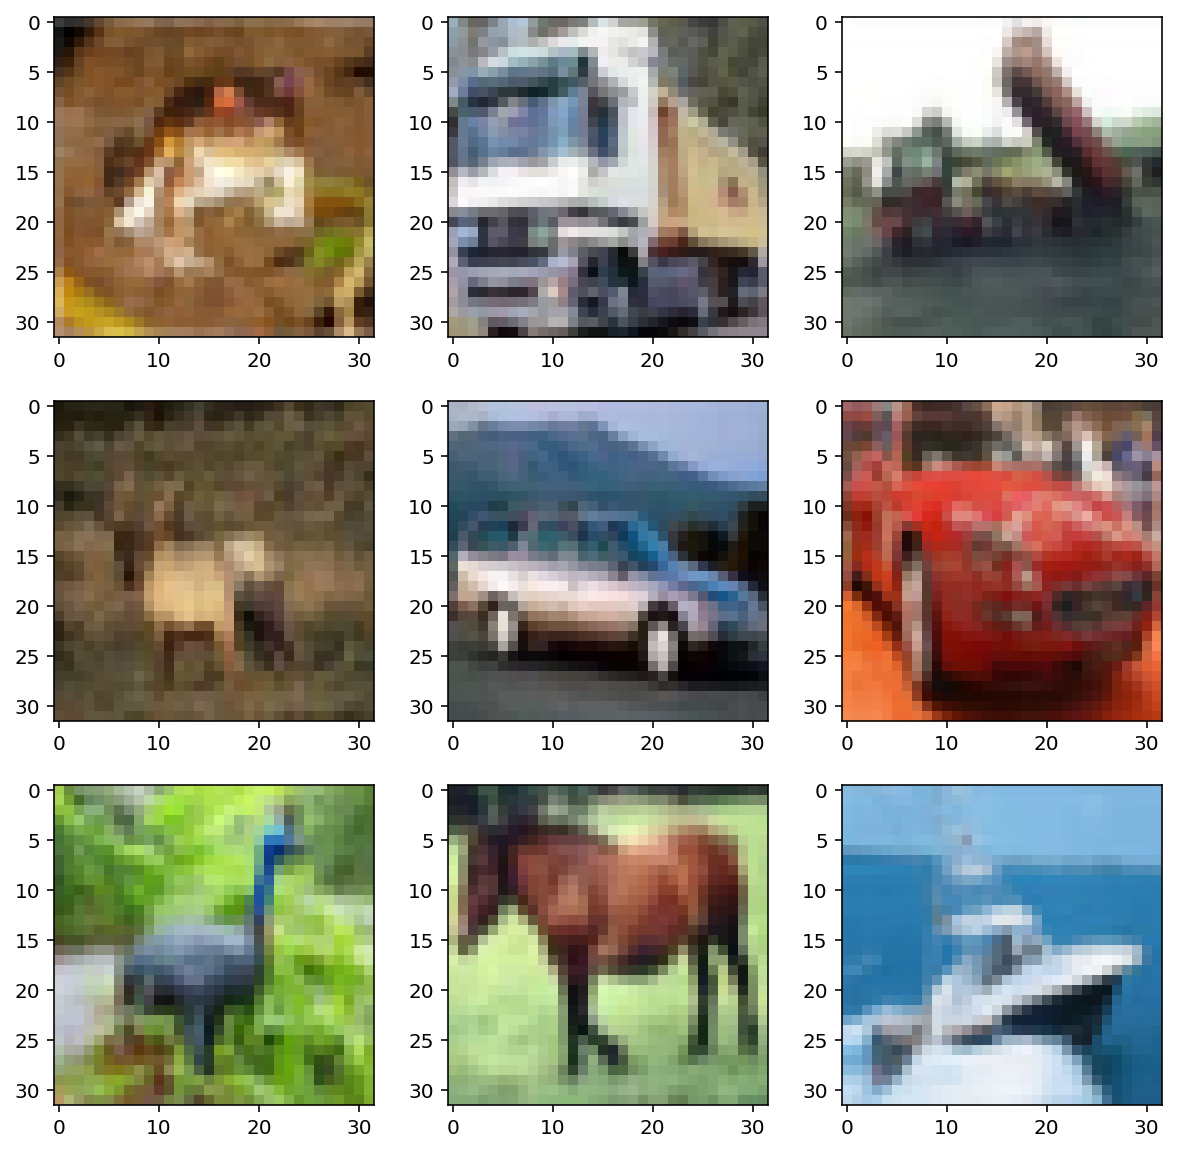

In [ ]:
# Set size of the figure plot
plt.figure(figsize=(10,10))

# Plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(cifar10_x_train[i])

# Show the figure
plt.show()

### Labels of Dataset

Based on the website, there are 10 labels in the dataset:

1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck
10. aeroplane

## Data Pre-Processing

### Data Sub-Sampling

The CIFAR10 train dataset is large: it has 50,000 images. Passing the entire dataset several times over the network will result in a better performing model, but the training time will take a long time.

For teaching, we perform a sub-sample of the dataset by taking 10% of the dataset to train our model. The same goes for the test dataset; only 10% of the data will be used to test the performance of our model.

In [ ]:
# Perfrom random sampling and keep 10% of the data as train dataset
cifar10_x_test_sub, _, cifar10_y_test_sub, _ = train_test_split(cifar10_x_test,
                                                                cifar10_y_test,
                                                                test_size=0.90,
                                                                random_state=42,
                                                                stratify=cifar10_y_test)

In [ ]:
# Perfrom random sampling and keep 10% of the data as test dataset
cifar10_x_train_sub, _, cifar10_y_train_sub, _ = train_test_split(cifar10_x_train,
                                                                  cifar10_y_train,
                                                                  test_size=0.90,
                                                                  random_state=42,
                                                                  stratify=cifar10_y_train)

### Reshaping Data

Similar to Fashion MNIST dataset, the images from CIFAR10 needs to be pre-processed by dividing each image by '255.0'. This will convert the pixels from between 0 and 255 to between 0 and 1.

In [ ]:
# normalise value
norm_cifar10_x_train = cifar10_x_train_sub/255.0
norm_cifar10_x_test = cifar10_x_test_sub/255.0

## Model Training with Same Architecture as Fashion MNIST

We use the same model's architecture and parameters for CIFAR10.

In [ ]:
cifar10_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,
                           kernel_size=(3, 3),
                           activation='relu',
                           input_shape=(norm_cifar10_x_train.shape[1],
                                        norm_cifar10_x_train.shape[2],
                                        norm_cifar10_x_train.shape[3])),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cifar10_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               921728    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
________________________________________________

In [ ]:
# Compile the model and add in optimiser, loss, and metrics
cifar10_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [ ]:
# Begin model training by fitting data to the model
cifar10_model.fit(norm_cifar10_x_train, cifar10_y_train_sub,
                  validation_split = 0.2,
                  callbacks=[callback],
                  shuffle=True,
                  verbose=2,
                  epochs=20,
                  use_multiprocessing=True)

Train on 4000 samples, validate on 1000 samples
Epoch 1/20
4000/4000 - 3s - loss: 2.0436 - accuracy: 0.2400 - val_loss: 1.7963 - val_accuracy: 0.3690
Epoch 2/20
4000/4000 - 2s - loss: 1.7051 - accuracy: 0.3810 - val_loss: 1.6360 - val_accuracy: 0.4140
Epoch 3/20
4000/4000 - 2s - loss: 1.5673 - accuracy: 0.4190 - val_loss: 1.6040 - val_accuracy: 0.4190
Epoch 4/20
4000/4000 - 2s - loss: 1.4756 - accuracy: 0.4725 - val_loss: 1.5376 - val_accuracy: 0.4520
Epoch 5/20
4000/4000 - 2s - loss: 1.3837 - accuracy: 0.5042 - val_loss: 1.5159 - val_accuracy: 0.4460
Epoch 6/20
4000/4000 - 2s - loss: 1.2995 - accuracy: 0.5395 - val_loss: 1.4885 - val_accuracy: 0.4530
Epoch 7/20
4000/4000 - 2s - loss: 1.2288 - accuracy: 0.5660 - val_loss: 1.4415 - val_accuracy: 0.4730
Epoch 8/20
4000/4000 - 2s - loss: 1.1937 - accuracy: 0.5727 - val_loss: 1.4565 - val_accuracy: 0.4620
Epoch 9/20
4000/4000 - 2s - loss: 1.1138 - accuracy: 0.6022 - val_loss: 1.4546 - val_accuracy: 0.4780
Epoch 10/20
4000/4000 - 2s - loss:

The model performance during the training stage has dropped from ~95% to ~69%! Let's take a look at the model performance on the test dataset.

In [ ]:
cifar10_model.evaluate(norm_cifar10_x_test, cifar10_y_test_sub)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.4395200080871582, 0.508]

What just happened? How come the model's performance on test dataset dropped from a high ~91% to a low of ~52% even though we use the same model architecture for CIFAR10 dataset?

The drop in performance is due to the additional complexity of CIFAR10 dataset; the objects in the image come in a different orientation and each has 3 colour channels (RGB) instead of just 1 (grayscale). Or to put it in another way, our model is too simple for the complexity of CIFAR10 dataset.

To improve our model performance, we have to use a more advanced method called **Transfer Learning**.

# Training An Advanced Image Classifier with Transfer Learning

When a prior model is trained on images, it has learned how to look at images, such as how to spot edges etc. The same skills that have been learned can be copied over to a new model to use on a new, but similar dataset.

## Define New Model Architecture for CIFAR10

Based on what we learned about transfer learning, we will use a pre-trained model to build a more robust model to handle the complexity of CIFAR10 dataset.

### Download Pre-Trained Model for Transfer Learning

[MobileNetV2](https://ai.googleblog.com/2018/04/mobilenetv2-next-generation-of-on.html) is pre-trained image classifier done by Google. Below is a picture of the basic structure of MobileNetV2:


![Overview of Basic Structure of MobileNetV2](https://1.bp.blogspot.com/-M8UvZJWNW4E/WsKk-tbzp8I/AAAAAAAAChw/OqxBVPbDygMIQWGug4ZnHNDvuyK5FBMcQCLcBGAs/s640/image5.png)


We download the model and remove the last layer of the pre-trained model by stating `include_top=False`. We do this because previously the model was trained to predict thousands of labels, but our dataset only has 10 labels to predict. To re-purpose any image classification model, the last layer of a pre-trained model always has to be removed and replaced with nodes the same number as our labels.

We also freeze the weights of the pre-trained model by `mobilenet.trainable=False` to speed up the model training. This is also done to avoid re-training previously trained layers.

These layers have learnt how to look for certain features in an image; re-training these base layers might result in them losing their optimal weights and biases.

In [ ]:
# Import MobileNetV2, a pre-trained image classifier, with last layer removed
mobilenet =  tf.keras.applications.MobileNetV2(include_top=False,
                                               weights='imagenet')

# Freeze pre-trained model's weight
mobilenet.trainable=False

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


Notice this particular error message?

`UserWarning: input_shape is undefined or non-square, or rows is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.`

The pre-trained image classifier is trained on images with a size of (224, 224); therefore it would expect images to be of the same size. Our CIFAR10 images have a size of (32, 32). We will need to resize our CIFAR10 images to use the pre-trained model; we can do this by doing data pre-processing.

### Model Training with Pre-Trained Model

Similar to the previous section, we need to define our model architecture to instruct how the data should be processed and how the model should learn.

We have added a new first layer in the model with `tf.image.resize`. As the name of the function suggests, this layer will first resize all images flowing into the model. This will help to mitigate the error message shown earlier.

After the images are pre-processed to be in the right size, the images will flow into the pre-trained model to train the image classifier.

In [ ]:
# Use pre-trained as our base model
model_pretrained = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224,224),
                                                         preserve_aspect_ratio=True,
                                                         method= tf.image.ResizeMethod.BICUBIC,
                                                         name='layers_upsample_image')),
    mobilenet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the pre-trained model
model_pretrained.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [ ]:
# Begin the model training
model_pretrained.fit(norm_cifar10_x_train, cifar10_y_train_sub,
                     validation_split = 0.2,
                     callbacks=[callback],
                     shuffle=True,
                     verbose=2,
                     epochs=20,
                     use_multiprocessing=True)

Train on 4000 samples, validate on 1000 samples
Epoch 1/20
4000/4000 - 244s - loss: 4.2279 - accuracy: 0.6033 - val_loss: 6.8145 - val_accuracy: 0.4970
Epoch 2/20
4000/4000 - 245s - loss: 0.9974 - accuracy: 0.8808 - val_loss: 5.7769 - val_accuracy: 0.5890
Epoch 3/20
4000/4000 - 246s - loss: 0.5408 - accuracy: 0.9310 - val_loss: 6.5185 - val_accuracy: 0.5690
Epoch 4/20
4000/4000 - 245s - loss: 0.4903 - accuracy: 0.9398 - val_loss: 5.8422 - val_accuracy: 0.6000
Epoch 5/20
4000/4000 - 246s - loss: 0.4329 - accuracy: 0.9463 - val_loss: 9.0914 - val_accuracy: 0.5420
Epoch 00005: early stopping


In [ ]:
# Test the model performance against test dataset
model_pretrained.evaluate(norm_cifar10_x_test, cifar10_y_test_sub)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[9.791547454833985, 0.54]

For the simple model, it performed 9 epochs to reach a test performance of 55% the model with transfer learning  performed 4 epochs to reach a test performance of 62%.

Note that for the actual full dataset, the test accuracy of this model can reach over 90%. This is not demonstrated here due to the intensive computational power required; running the model with transfer learning on the full dataset will take a long time!

In [ ]:
# Print out overview of the model
model_pretrained.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              multiple                  0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, None, None, 1280)  2257984   
_________________________________________________________________
flatten_2 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  627210    
Total params: 2,885,194
Trainable params: 627,210
Non-trainable params: 2,257,984
_________________________________________________________________


Our earlier model for Fashion MNIST has 693,962 trainable parameters. Our current model has a total of 2,885,194 parameters, but only 627,210 of it is trainable. This is because we have frozen the pre-trained model's weights. The only trainable layer is the last dense layer.

## Summary

In the second section of this exercise, we tried using the same simple model architecture we used for the Fashion MNIST. The model's performance dropped significantly from 90% to 54%; this is expected as the images of CIFAR10 is more complex. To overcome this, we used Transfer Learning by incorporating a pre-trained image classifier model - MobileNetV2 - as our base model.

The weights of the pre-trained model are frozen and the last layer is removed to re-purpose the model for our CIFAR10 dataset. We also added an image resizing function as the first layer of the model to resize our CIFAR10 image from (32, 32) to (224, 224). The model performance for CIFAR10 increased to 62%.

# Congratulations!

Congratulations for finishing this code walkthrough!